In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:



templates = {1:'Ell', 2:'Sbc', 3:'Scd',
             4:'Irr', 5:'SB3', 6:'SB2', 
             7:'ssp_25Myr', 8:'ssp_5Myr'}

DOY = {'DOY':{1:[3, 2.56705], 2:[4, 2.67665], 3:[2, 2.13082]}, 'SHD':{1:[6, 0.29685], 2:[2, 0.21826], 3:[7, 0.42402]}}
SHD = {'DOY':{1:[3,0.16633], 2:[6, 0.43124], 3:[2, 0.27595]}, 'SHD':{1:[4,2.63879], 2:[3, 2.75506], 3:[6, 2.65174]}}

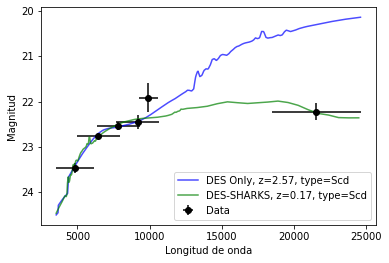

In [9]:
id_=1
outlier = 'DOY'

best_fit_doy = 'spec_0%d_DOY_outliers%s' %(id_, outlier)
best_mags_doy = 'mags_0%d_DOY_outliers%s' % (id_, outlier)

best_fit_shd = 'spec_0%d_SHD_outliers%s' %(id_, outlier)
best_mags_shd = 'mags_0%d_SHD_outliers%s' % (id_, outlier)


lm_doy, spec_doy = np.loadtxt(best_fit_doy, unpack=True)
lm_shd, spec_shd = np.loadtxt(best_fit_shd, unpack=True)

mask_doy = (lm_doy<24650)&(lm_doy>3520)
mask_shd = (lm_shd<24650)&(lm_shd>3520)
lm_doy = lm_doy[mask_doy]
spec_doy = spec_doy[mask_doy]
lm_shd = lm_shd[mask_shd]
spec_shd = spec_shd[mask_shd]

mags_obs, lam_c, lam_err, mags_doy, err_obs = np.loadtxt(best_mags_doy, unpack=True, usecols=(0,2,3,4,1))
mags_shd, _ = np.loadtxt(best_mags_doy, unpack=True, usecols=(4,5))

plt.plot(lm_doy,spec_doy, label='DES Only, z=%.2f, type=%s' %(DOY[outlier][id_][1], templates[DOY[outlier][id_][0]]), c='b', alpha=0.7)
plt.plot(lm_shd,spec_shd, label='DES-SHARKS, z=%.2f, type=%s' %(SHD[outlier][id_][1], templates[SHD[outlier][id_][0]]), c='g', alpha=0.7)
plt.errorbar(lam_c,mags_obs,xerr=lam_err,yerr=err_obs, label='Data', c='k', fmt='o', alpha=1.)
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('Longitud de onda')
plt.ylabel('Magnitud')
plt.savefig('comparison0%d_%s.png' % (id_,outlier))

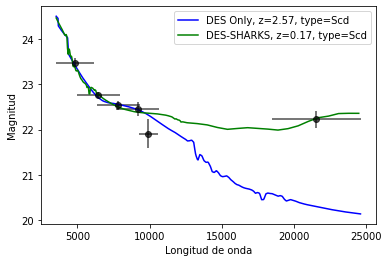

In [31]:

#plt.invert_y_axis()